In [1]:
# Import required libraries

# Reading Dataset
import pandas as pd

# Calculations
import numpy as np

# Graphing
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# plt.rcParams['figure.figsize'] = [10.0, 15.0]
# plt.rcParams['figure.dpi'] = 150

# Regression
from sklearn.model_selection import train_test_split as tts
from scipy.optimize import curve_fit

In [2]:
dataset = pd.read_csv("GDP_dataset.csv")
dataset[:] = dataset[:].astype(float)

# Independent Variables
ind_names = dataset.keys()[2:]

# Dependent Variable
dep_name = dataset.keys()[1]

# Train Test Data
train_size = 0.7
headers = ["Year"] + list(ind_names)
data_train, data_test, Y_train, Y_test = tts(dataset[headers], dataset[dep_name], train_size=train_size, random_state=10)

# Initial Regression coefficients
coeff = np.ones(len(ind_names))

# Regression Curve
def regression(X, *C):
    """
    Regression curve
    """
    print(C)
    C = np.array(C)
    C = C.reshape([len(ind_names), 1])

    return np.array(X).dot(C)

In [3]:
corelation = dataset.corr()["GDP"][2:]
print("Spearman corelation of Dependent ({:s}) vs Independent Variables".format(dep_name))
corelation

Spearman corelation of Dependent (GDP) vs Independent Variables


Imports                   0.982253
Trade                     0.724416
Net income from abroad   -0.942431
Inflation                -0.400447
Tax revenue               0.995443
FDI                       0.718257
CO2 emissions             0.955332
International Taxes       0.844302
Name: GDP, dtype: float64

(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)


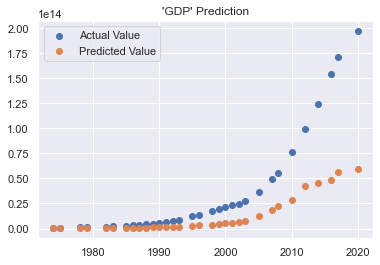

In [4]:
plt.title("'{:s}' Prediction".format(dep_name))
plt.scatter(data_train["Year"], Y_train, label="Actual Value")
plt.scatter(data_train["Year"], regression(data_train[ind_names], *coeff), label="Predicted Value")
plt.legend(loc=0)

In [5]:
coeff, _ = curve_fit(regression, data_train[ind_names], Y_train, p0=coeff)

(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)


ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.